In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [3]:
data = pd.read_csv('battery4.csv')

In [4]:
data.iloc[360:,16:] = data.iloc[360:,16:]+0.002
data.iloc[370:,16:] = data.iloc[370:,16:]+0.002
data.iloc[375:,16:] = data.iloc[375:,16:]+0.0025
data.iloc[380:,16:] = data.iloc[380:,16:]+0.0025
data.iloc[385:,16:] = data.iloc[385:,16:]+0.0025
data.iloc[390:,16:] = data.iloc[390:,16:]+0.0025
data.iloc[395:,16:] = data.iloc[395:,16:]+0.0045
data.iloc[400:,16:] = data.iloc[400:,16:]+0.0045
data.iloc[410:,16:] = data.iloc[410:,16:]+0.0045
data.iloc[415:,16:] = data.iloc[415:,16:]+0.0045
data.iloc[420:,16:] = data.iloc[420:,16:]+0.0045
data.iloc[425:,16:] = data.iloc[425:,16:]+0.0045
data.iloc[430:,16:] = data.iloc[430:,16:]+0.0045
data.iloc[435:,16:] = data.iloc[435:,16:]+0.0045
data.iloc[440:,16:] = data.iloc[440:,16:]+0.0045
data.iloc[445:,16:] = data.iloc[445:,16:]+0.0045
data.iloc[450:,16:] = data.iloc[450:,16:]+0.0045

In [5]:
data.iloc[0:500,:]

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
0,1.093864,1.053779,1.061124,1.072052,1.085115,1.084768,1.079873,1.072951,1.077832,1.076617,...,1.048037,1.068739,1.079052,1.065647,1.072897,1.073279,1.078461,1.074521,1.080285,1.073539
1,1.095110,1.055032,1.062743,1.073284,1.086302,1.086073,1.081349,1.074008,1.079117,1.077839,...,1.048029,1.070214,1.079789,1.069589,1.074119,1.074917,1.079322,1.076363,1.081616,1.075482
2,1.095954,1.055879,1.063727,1.073923,1.086993,1.086794,1.082160,1.074338,1.079908,1.078287,...,1.049100,1.071219,1.081907,1.070322,1.074464,1.076030,1.081835,1.077149,1.082426,1.076341
3,1.096473,1.056445,1.064625,1.074507,1.087482,1.087259,1.082676,1.074802,1.080498,1.078532,...,1.049680,1.071343,1.081973,1.072234,1.075239,1.076564,1.082127,1.076919,1.082781,1.076367
4,1.096961,1.057079,1.065286,1.074894,1.087778,1.087622,1.082917,1.075244,1.080784,1.078815,...,1.049286,1.071758,1.082556,1.069982,1.075158,1.077193,1.082861,1.077425,1.082832,1.076983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.070990,1.036515,1.039699,1.058989,1.053314,0.999587,1.040817,1.017522,1.042987,1.051578,...,NaN,0.956240,0.984190,0.937571,NaN,0.933819,NaN,0.985581,0.922828,NaN
496,1.070811,1.037011,1.039902,1.058679,1.052916,0.998971,1.038373,1.017094,1.042665,1.051510,...,NaN,0.955052,0.982451,0.935226,NaN,0.931167,NaN,0.984172,0.921494,NaN
497,1.070715,1.035926,1.039532,1.058430,1.052568,0.997573,1.037503,1.016551,1.042589,1.051043,...,NaN,0.954412,0.980686,0.933872,NaN,0.929810,NaN,0.982880,0.919959,NaN
498,1.070557,1.035880,1.039491,1.058264,1.052306,0.996256,1.038974,1.015924,1.041990,1.048896,...,NaN,0.953712,0.978747,0.931615,NaN,0.927685,NaN,0.981604,0.918676,NaN


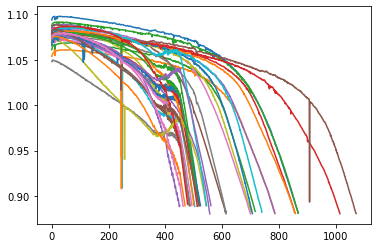

In [6]:
plt.plot(data)

# 전처리

In [7]:
data_ = data.iloc[:,:16]
data_.fillna(0,inplace = True)

data_2 = data.iloc[:,:]
data_2.fillna(0,inplace = True)

b= (data_<=0.89).sum()
data__ = []
for i in range(16):
    data__.append(data_.iloc[:len(data_)-(b[i]-1),i])
    
for i in range(len(data__)):
    data__[i][len(data__[i])-1] = 0.89

b2= (data_2<=0.89).sum()
data__2 = []
for i in range(37 ):
    data__2.append(data_2.iloc[:len(data_2)-(b2[i]-1),i])
    
for i in range(len(data__2)):
    data__2[i][len(data__2[i])-1] = 0.89

data___2 = [i for i in range(((len(data__2))))]
for i in range(0,len(data___2)):
    data___2[i] = [None]
for i in range(0,len(data___2)):
    data___2[i]= [data__2[i][0:70].mean()-data__2[i][100:120].mean()]
    data___2[i].append(data__2[i][0:50].mean()-data__2[i][200:220].mean())
    data___2[i].append(data__2[i][0:50].mean()-data__2[i][300:320].mean())
    data___2[i].append(data__2[i][0:50].mean()-data__2[i][400:420].mean())
    data___2[i].append(data__2[i][0:50].mean()-data__2[i][450:460].mean())

___y2= []
for i in range(len(data__2)):
    ___y2.append(len(data__2[i]))
    
data___ = [i for i in range(((len(data__))))]
for i in range(0,len(data___)):
    data___[i] = [None]
for i in range(0,len(data___)):
    data___[i]= [data__[i][0:70].mean()-data__[i][100:120].mean()]
    data___[i].append(data__[i][0:50].mean()-data__[i][200:220].mean())
    data___[i].append(data__[i][0:50].mean()-data__[i][300:320].mean())
    data___[i].append(data__[i][0:50].mean()-data__[i][400:420].mean())
    data___[i].append(data__[i][0:50].mean()-data__[i][540:550].mean())

___y= []
for i in range(len(data__)):
    ___y.append(len(data__[i]))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


# RandomForest 사용

In [9]:
rf = RandomForestClassifier(n_estimators=30, oob_score=True, random_state=123456)
rf.fit(data___2[0:30], ___y2[0:30])

RandomForestClassifier(n_estimators=30, oob_score=True, random_state=123456)

In [10]:
predicted = rf.predict(data___2[30:])

In [11]:
print("예측 RUL : ",predicted)
print("실제 RUL : ",___y2[30:])

예측 RUL :  [513 451 513 486 513 553 451]
실제 RUL :  [524, 470, 518, 480, 561, 519, 463]


In [18]:
mse = np.square(np.subtract(___y2[30:],predicted)).mean()
print("mse = ",mse)

mse =  8114.428571428572


# Voting 사용

In [13]:
bc_clf =  GradientBoostingClassifier(n_estimators=30, learning_rate=0.1,max_depth=8, random_state=0)
rnd_clf = RandomForestClassifier(n_estimators=30)
dt_clf = DecisionTreeClassifier(random_state=0)

voting_clf = VotingClassifier(estimators=[('nc',bc_clf),
                                         ('rf',rnd_clf),
                                         ('dt',dt_clf)],
                             voting='soft')
voting_clf.fit(data___2[0:30], ___y2[0:30])

VotingClassifier(estimators=[('nc',
                              GradientBoostingClassifier(max_depth=8,
                                                         n_estimators=30,
                                                         random_state=0)),
                             ('rf', RandomForestClassifier(n_estimators=30)),
                             ('dt', DecisionTreeClassifier(random_state=0))],
                 voting='soft')

In [14]:
predicted = voting_clf.predict(data___2[30:])

In [15]:
print("예측 RUL : ",predicted)
print("실제 RUL : ",___y2[30:])

예측 RUL :  [513 451 608 485 778 488 451]
실제 RUL :  [524, 470, 518, 480, 561, 519, 463]


In [17]:
mse = np.square(np.subtract(___y2[30:],predicted)).mean()
print("mse = ",mse)

mse =  8114.428571428572
